In [13]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_feather("../../data/raw/work_school_home_sp.feather")

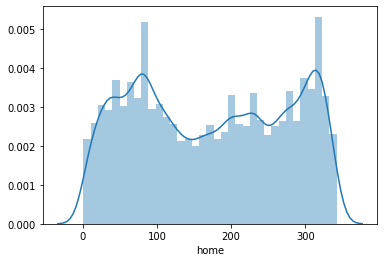

In [12]:


sns.distplot(df['home'])

In [27]:
df

,home,school,work,id,work_x,work_y,school_x,school_y,home_x,home_y,home_id,idade,criteriobr,renda_fa,private_healthcare,neighb
55365,342.0,NaN,32.0,03420007101,330709.0,7393610.0,NaN,NaN,322410.0,7390806.0,03420007,68.0,NaN,5889.162122,True,9
55366,342.0,NaN,NaN,03420013101,NaN,NaN,NaN,NaN,322897.0,7390509.0,03420013,74.0,3.0,2000.000000,False,4
55367,342.0,NaN,NaN,03420013102,NaN,NaN,NaN,NaN,322897.0,7390509.0,03420013,72.0,3.0,2000.000000,False,4
55368,342.0,NaN,32.0,03420014101,330526.0,7393790.0,NaN,NaN,323644.0,7392120.0,03420014,53.0,2.0,2000.000000,False,2
55369,342.0,NaN,NaN,03420014102,NaN,NaN,NaN,NaN,323644.0,7392120.0,03420014,36.0,2.0,2000.000000,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55487,342.0,NaN,90.0,03421904103,327737.0,7396374.0,NaN,NaN,323322.0,7392038.0,03421904,27.0,1.0,9461.630458,True,10
55488,342.0,NaN,341.0,03422006101,323653.0,7391801.0,NaN,NaN,322857.0,7390956.0,03422006,52.0,1.0,9461.630458,True,1
55489,342.0,NaN,341.0,03422006102,323653.0,7391801.0,NaN,NaN,322857.0,7390956.0,03422006,26.0,1.0,9461.630458,True,1
55490,342.0,NaN,342.0,03422109101,323034.0,7390476.0,NaN,NaN,323034.0,7390476.0,03422109,28.0,3.0,3000.000000,False,4


In [59]:
from sklearn.cluster import KMeans

data = []
means = []

for zone in df['home'].unique():
    if pd.notna(zone):
        tmp = df[df['home'] == zone].copy()
        X = tmp[['home_x', 'home_y']]
        n_clusters = int(np.sum(df['home'] == zone) / 10)
        kmeans = KMeans(n_clusters=n_clusters, random_state=52).fit(X)
        tmp['Neighbourhood'] = kmeans.labels_
        
        data.append(tmp)

df = pd.concat(data)

In [57]:
zone = 100
zone_df = df[df['home'] == zone].sort_values(by='Neighbourhood')
zone_df['Neighbourhood'] = zone_df['Neighbourhood'].astype(str)

fig = px.scatter(zone_df, x='home_x', y='home_y', color='Neighbourhood')
fig.update_layout(title=f'Neighbourhoods - Zone {zone}')

In [58]:
zone = 50
zone_df = df[df['home'] == zone].sort_values(by='Neighbourhood')
zone_df['Neighbourhood'] = zone_df['Neighbourhood'].astype(str)

fig = px.scatter(zone_df, x='home_x', y='home_y', color='Neighbourhood')
fig.update_layout(title=f'Neighbourhoods - Zone {zone}')